# 1. Import & Setup

In [1]:
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import random

# Add project root to path
current_dir = Path(os.getcwd())
project_root = current_dir.parent
sys.path.append(str(project_root))

# Paths
hr_path = project_root / "data" / "DIV2K" / "HR_patches"
lr_path = project_root / "data" / "DIV2K" / "LR_patches"

# 2. Visualization Logic

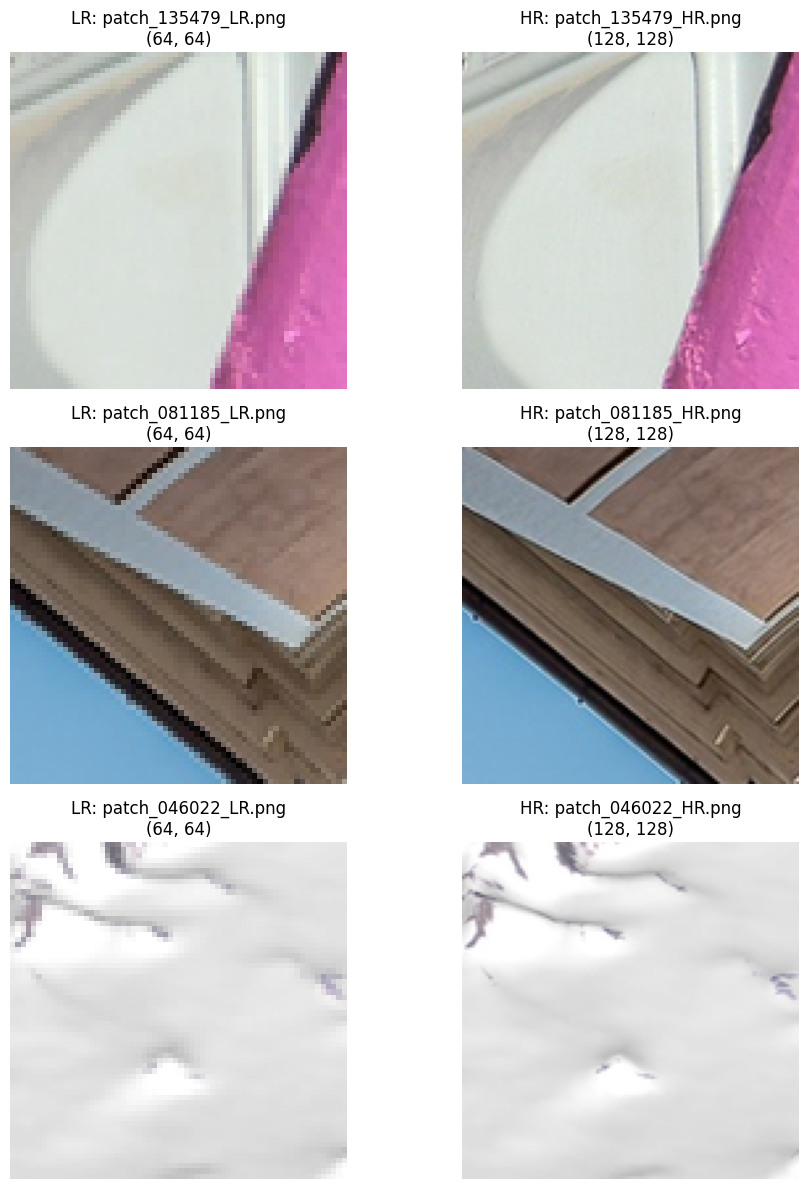

In [3]:
def visualize_dataset_fixed(num_samples=3):
    # 1. Ambil semua file HR
    hr_files = sorted(list(hr_path.glob("*.png")) + list(hr_path.glob("*.jpg")))
    
    if not hr_files:
        print("Folder HR_patches kosong!")
        return

    # 2. Ambil sampel acak
    indices = random.sample(range(len(hr_files)), min(num_samples, len(hr_files)))
    
    plt.figure(figsize=(10, 4 * len(indices)))
    
    for i, idx in enumerate(indices):
        hr_file = hr_files[idx]
        
        # Ganti "_HR" menjadi "_LR" pada nama file
        lr_name = hr_file.name.replace("_HR", "_LR")
        lr_file = lr_path / lr_name
        
        # Cek apakah file LR ada?
        if not lr_file.exists():
            print(f" Pasangan tidak ditemukan: {lr_name}")
            continue

        try:
            hr_img = Image.open(hr_file)
            lr_img = Image.open(lr_file)

            # Plot LR (Kiri)
            plt.subplot(len(indices), 2, 2*i + 1)
            plt.imshow(lr_img)
            plt.title(f"LR: {lr_file.name}\n{lr_img.size}")
            plt.axis('off')

            # Plot HR (Kanan)
            plt.subplot(len(indices), 2, 2*i + 2)
            plt.imshow(hr_img)
            plt.title(f"HR: {hr_file.name}\n{hr_img.size}")
            plt.axis('off')
            
        except Exception as e:
            print(f"Error: {e}")

    plt.tight_layout()
    plt.show()

# Jalankan
visualize_dataset_fixed()